In [9]:
import io
import spotipy

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import pandas as pd

from collections import Counter, OrderedDict
from spotipy.oauth2 import SpotifyOAuth

[91, 62, 91]


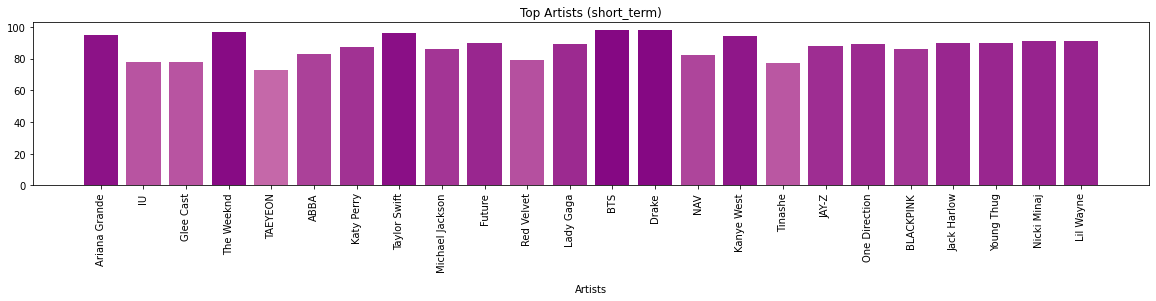

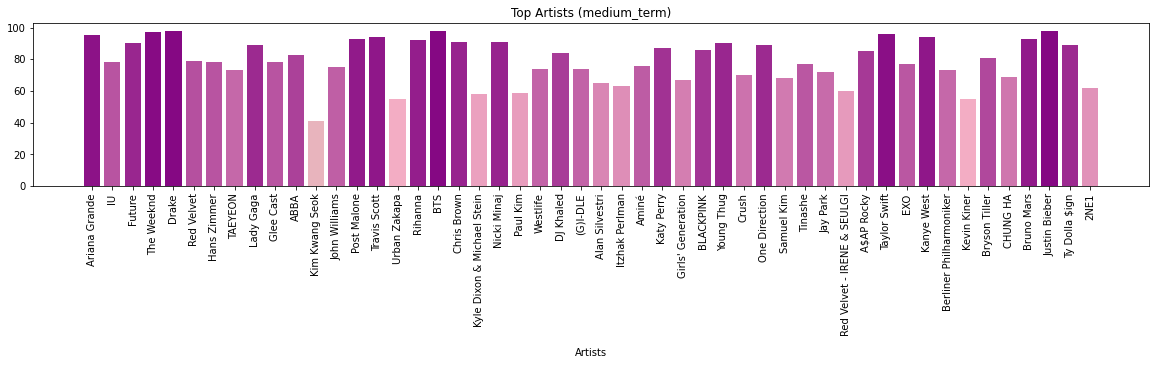

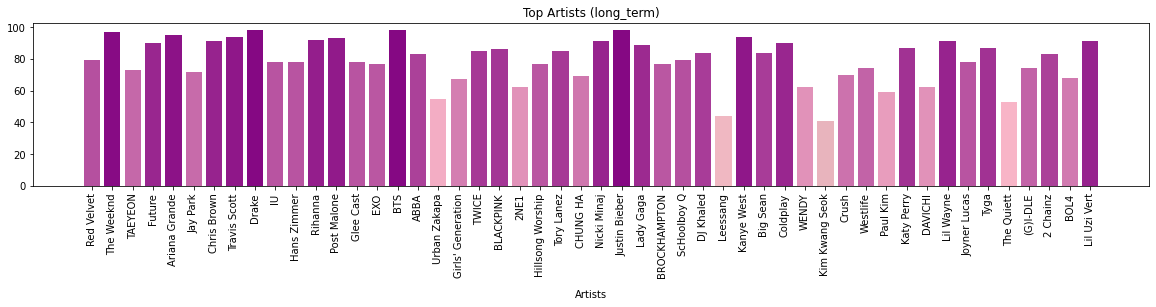

In [10]:
scope = 'user-top-read'
ranges = ['short_term', 'medium_term', 'long_term']

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope))


sml = []
pop = [],[],[]
artist = [],[],[]
terms = ['short_term', 'medium_term', 'long_term']
pop_score = 0

for i in range(3):

    results = sp.current_user_top_artists(time_range=terms[i], limit=50)

    for j, item in enumerate(results['items']):
        popularity = item['popularity']
        pop_score += popularity
        artist[i].append(item['name'])
        pop[i].append(popularity)
    sml.append(popularity)
print(sml)

plt.rcParams["figure.figsize"] = (20,3)

for i in range(3):
    df = pd.DataFrame({"x" : pop[i]})

    cmap = mcolors.LinearSegmentedColormap.from_list("", ["grey", "pink", "purple"])
    
    plt.bar(artist[i], df["x"], color=cmap(df.x.values/100))
    plt.xlabel('Artists', labelpad=12)
    plt.xticks(rotation=90)
    
    plt.title("Top Artists ("  + terms[i] + ")")
    plt.show()

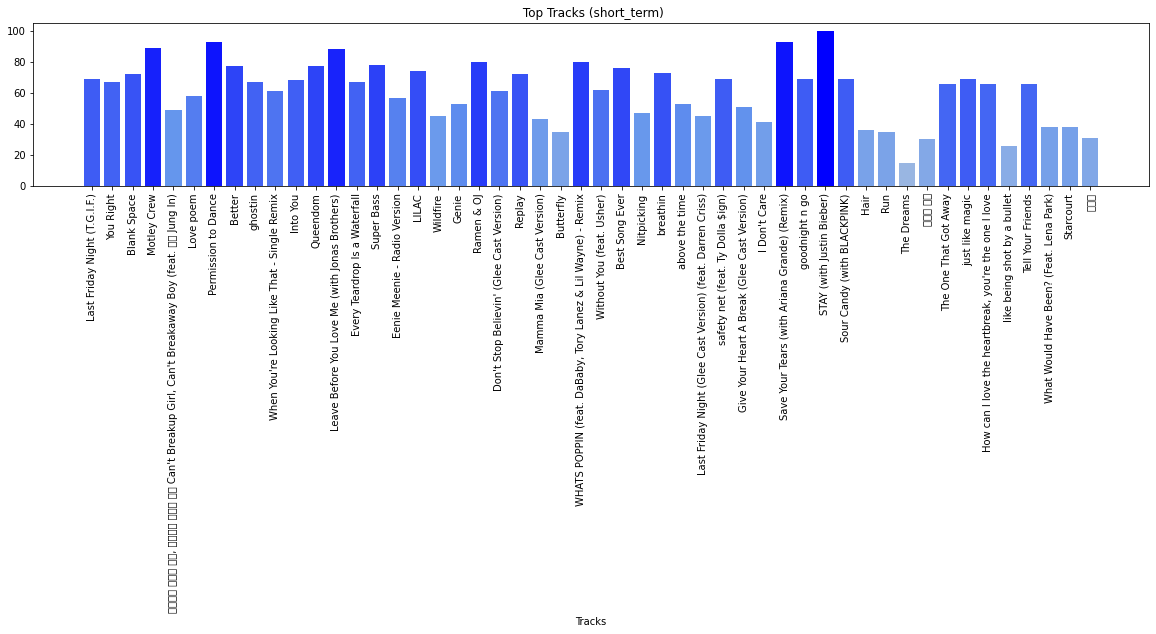

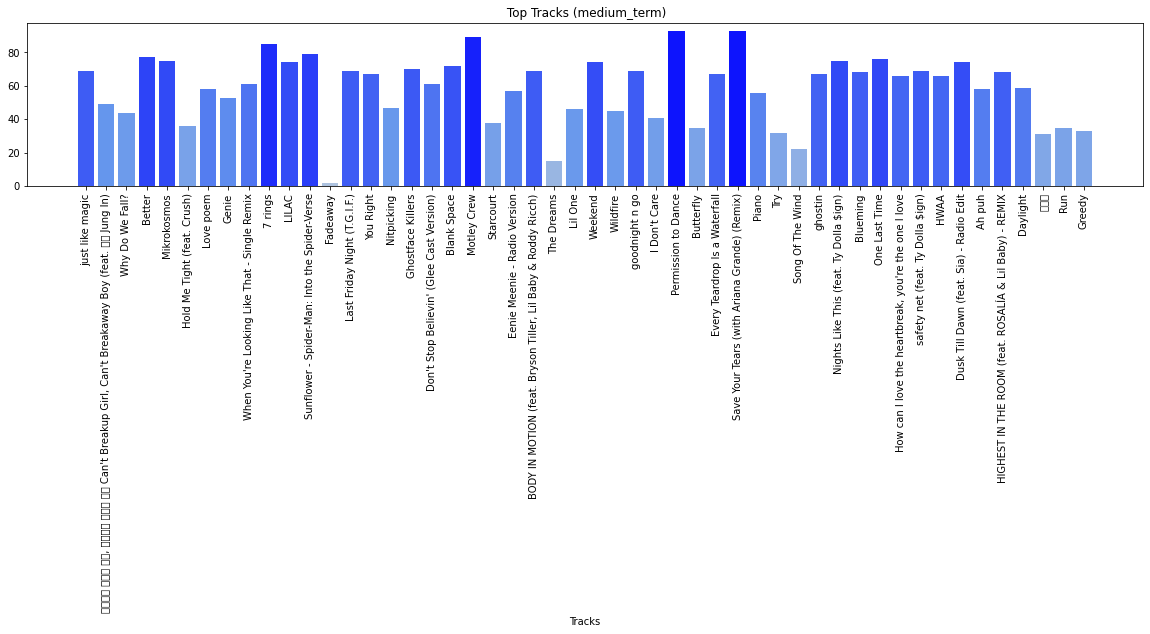

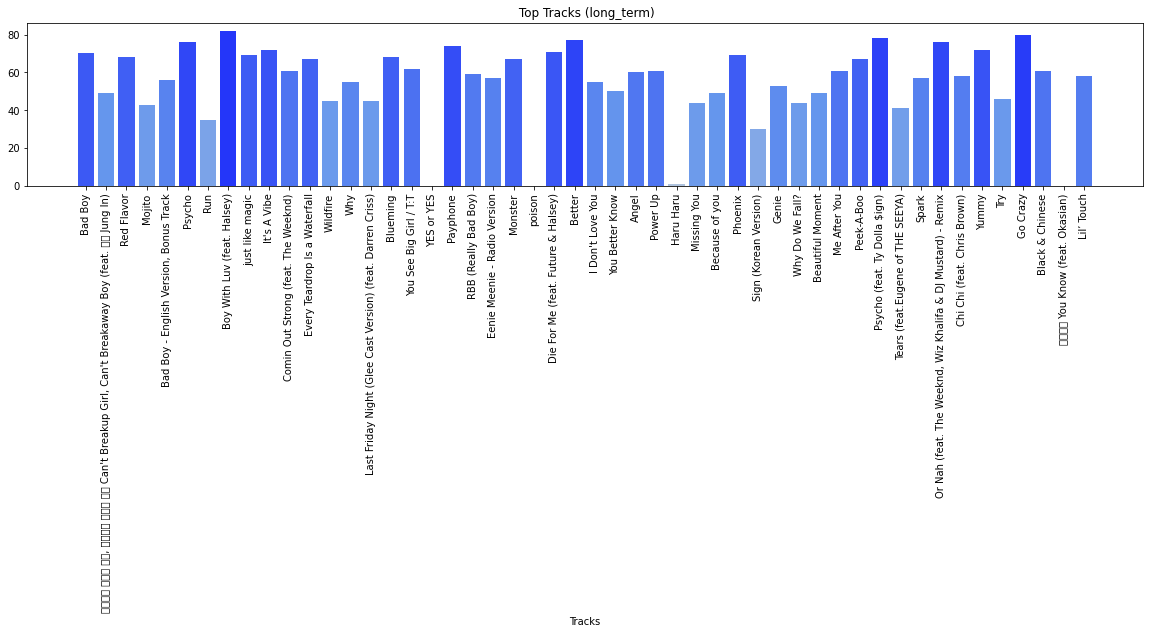

In [11]:
artists = [],[],[]
tracks = [],[],[]
track_pop = [],[],[]

for i in range(3):
    results = sp.current_user_top_tracks(limit=50,offset=0,time_range=terms[i])
    
    text = ""
        
    for j, item in enumerate(results['items']):
        popularity = item['popularity']
        track = item['name']
        track_pop[i].append(popularity)
        tracks[i].append(track)
        
        target = item['artists']
        name = target[0]
        artist = name['name']
        artists[i].append(artist)
        
    df2 = pd.DataFrame({"x" : track_pop[i]})

    cmap = mcolors.LinearSegmentedColormap.from_list("", ["lightsteelblue", "cornflowerblue", "blue"])
    
    plt.bar(tracks[i], df2["x"], color=cmap(df2.x.values/100))
    plt.xlabel('Tracks', fontsize=10)
    plt.xticks(rotation=90)
    plt.title(" Top Tracks (" + terms[i] + ")")
    plt.show()

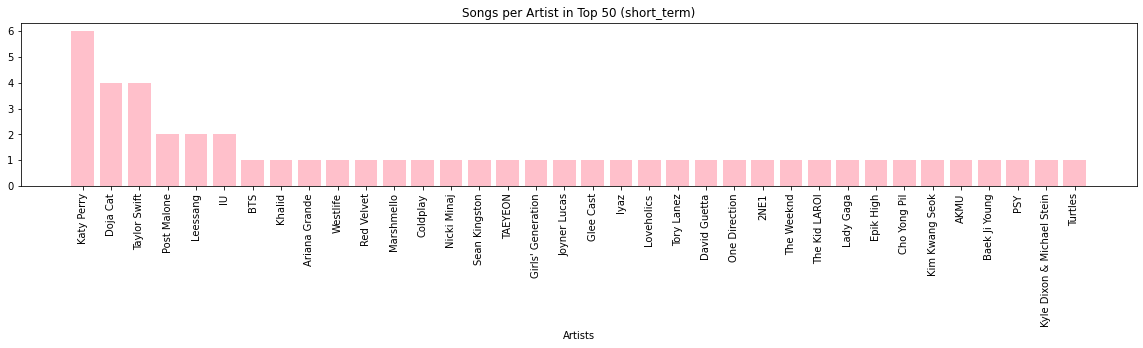

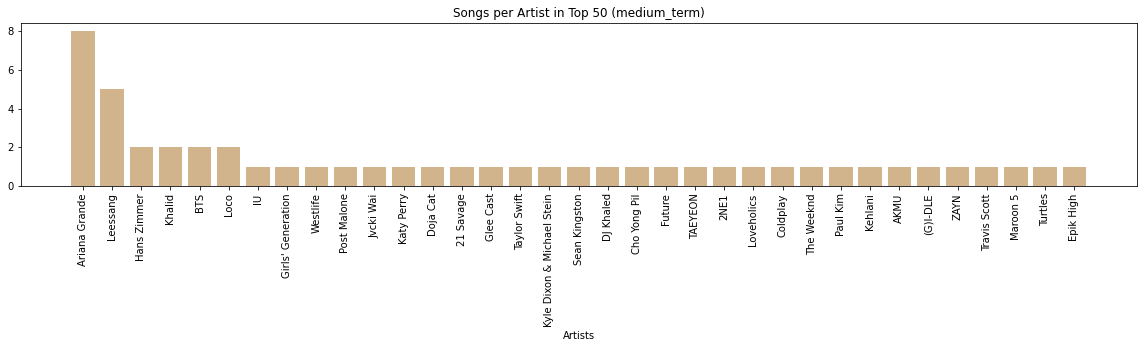

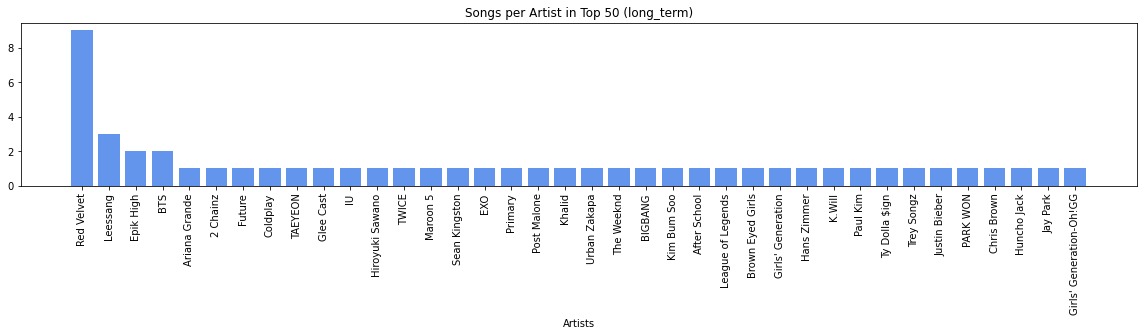

<Figure size 1440x216 with 0 Axes>

In [12]:
colors = ['pink','tan','cornflowerblue']

for i, artist in enumerate(artists):
    df3 = pd.DataFrame(artist)
    c = Counter(df3[0])
    y = OrderedDict(c.most_common())
    df4 = pd.DataFrame({"x" : c})
    plt.bar(c.keys(), y.values(),color=colors[i])
    plt.xticks(rotation=90)

    plt.xlabel('Artists', fontsize=10)
    plt.title("Songs per Artist in Top 50 (" + terms[i] + ")")
    plt.show()
    if i == 2:
        buf = io.BytesIO()
        plt.savefig(buf, format = 'png')
        buf.seek(0)
    